# *p*-Adic Signals & Wavelets.

## *p*-Adic Numbers.

In [163]:
import copy

import numpy as np
import math

import matplotlib.pyplot as plt

### Class: `pAdic`, basic *p*-adic number class.
The `.fractional` attribute here computes the value under the *p*-adic *fractional part* map $\{-\}_p:\mathbb{Q}_p\longrightarrow\mathbb{Q}/\mathbb{Z}$.

In [164]:
class pAdic():
    
    def __init__(self, base, p_gits, norm):
        
        assert isinstance(base, int)
        assert base > 0
        
        assert isinstance(p_gits, list)
        for a in p_gits:
            assert isinstance(a, int)
            assert 0 <= a < base
            
        assert isinstance(norm, int)
            
        self.base = base
        self.p_gits = p_gits
        self.norm = norm
        
        term_dict = {}
        for k, a in enumerate(self.p_gits):
            term_order = self.norm - k
            term = a * (self.base**term_order)
            term_dict.update({term_order : term})
        self.term_dict = term_dict
        
        rational = sum(term_dict.values())
        self.rational = rational
        
        fractional = 0
        for order in self.term_dict:
            if order < 0:
                term = self.term_dict[order]
                fractional += term
        self.fractional = fractional

Testing:

In [165]:
X = pAdic(5, [2, 4, 1, 1,2,0,3], 3)

print('\nbase p:', X.base)
print('\np-adic digits:', X.p_gits)
print('\np-adic norm:', X.norm)
print('\ndictionary of p-adic terms:', X.term_dict)
print('\ncorresponding rational number', X.rational)
print('\nfractional part', X.fractional)


base p: 5

p-adic digits: [2, 4, 1, 1, 2, 0, 3]

p-adic norm: 3

dictionary of p-adic terms: {3: 250, 2: 100, 1: 5, 0: 1, -1: 0.4, -2: 0.0, -3: 0.024}

corresponding rational number 356.424

fractional part 0.42400000000000004


### Function: `to_pAdic`, a version of the canonical embedding $\mathbb{Q}\longrightarrow\mathbb{Q}_p$.

In [166]:
def to_pAdic(number, p, m):
    assert isinstance(number, int) or isinstance(number, float)
    assert number >= 0
    assert isinstance(p, int)
    assert p >= 2
    assert isinstance(m, int)
    assert m >= 1
    
    number = float(number)
    epsilon = copy.deepcopy(number)
    
    n=0
    while p**n <= epsilon:
        n = n+1
        
    norm = n-1
    resolution = m
    
    new_norm = -n
    new_resolution = -m-1
    
    a = []
    for i in range(norm, -resolution, -1) :
        p_git = math.floor(epsilon/(p**i))
        epsilon -= p_git*(p**i)
        a.append(p_git)
    
    b = copy.deepcopy(a)
    a.reverse()
        
    return new_norm, a, new_resolution, norm, b, resolution, p

Testing:

* **Need to fix `pAdic.rational` attribute.** **[✓]**

In [206]:
output = to_pAdic(0.33666, 3, 10)
print(output)

N = output[0]
L = output[1]
m = output[2]

print('\np-adic order:', N)
print('\np-adic digits:', L)
print('\np-adic resolution:', m,'\n')

a = 0
for k, b in enumerate(L):
    a += b*3**(N-k)
    
print(a)

A = pAdic(3, L, N)
print(A.base)
print(A.p_gits)
print(A.term_dict)
print(A.rational)
print(A.fractional)

(0, [2, 0, 1, 2, 0, 0, 0, 0, 1], -11, -1, [1, 0, 0, 0, 0, 2, 1, 0, 2], 10, 3)

p-adic order: 0

p-adic digits: [2, 0, 1, 2, 0, 0, 0, 0, 1]

p-adic resolution: -11 

2.185337600975461
3
[2, 0, 1, 2, 0, 0, 0, 0, 1]
{0: 2, -1: 0.0, -2: 0.1111111111111111, -3: 0.07407407407407407, -4: 0.0, -5: 0.0, -6: 0.0, -7: 0.0, -8: 0.00015241579027587258}
2.185337600975461
0.18533760097546104


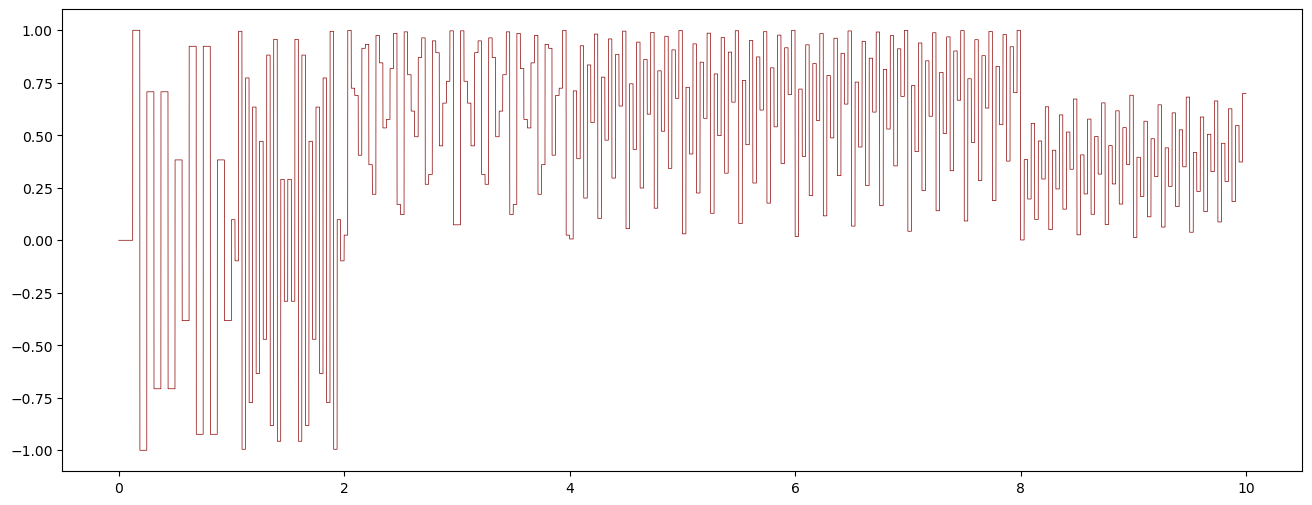

In [216]:
p = 2

T = np.array([.001*j for j in range(10000)])

Y = []
for t in T:
    t = t
    output = to_pAdic(t, p, 6)
    N = output[0]
    L = output[1]
    A = pAdic(p, L, N)
    y = A.fractional
    y = np.sin(2*np.pi*y)
    Y.append(y)
Y = np.array(Y)

plt.figure(figsize=(16,6))
plt.plot(T, Y, color='darkred', linewidth=0.5)
plt.show()

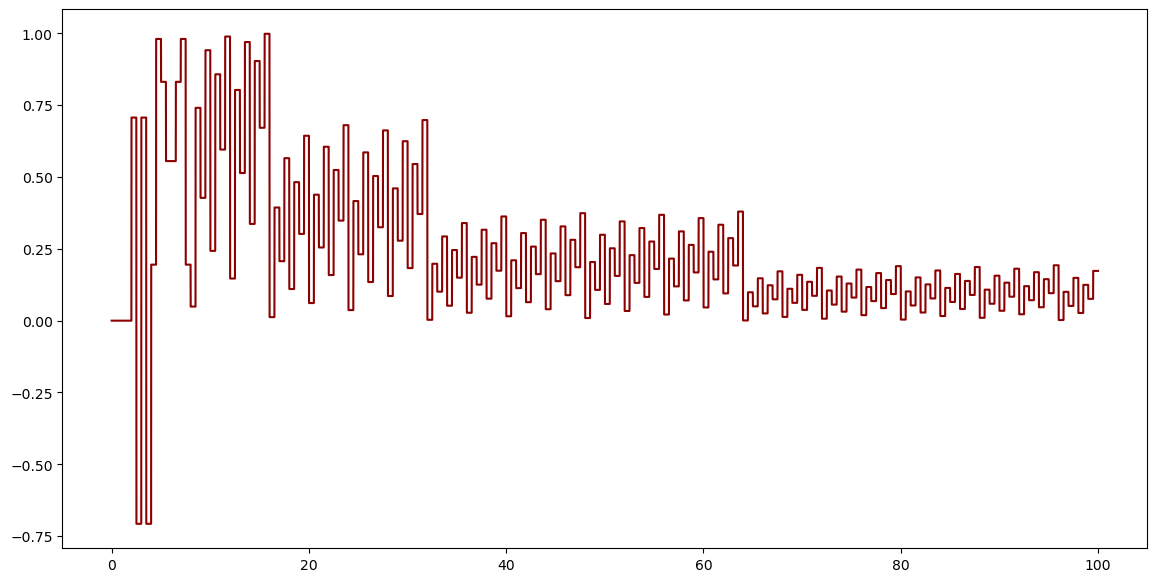

In [162]:
p = 2

T = np.array([.001*j for j in range(100000)])

Y = []
for t in T:
    t = (1/2) * t
    output = to_pAdic(t, p, 3)
    N = output[0]
    L = output[1]
    A = pAdic(p, L, N)
    y = A.fractional
    y = np.sin(2*np.pi*y)
    Y.append(y)
Y = np.array(Y)

plt.figure(figsize=(14,7))
plt.plot(T, Y, color='darkred')
plt.show()

0


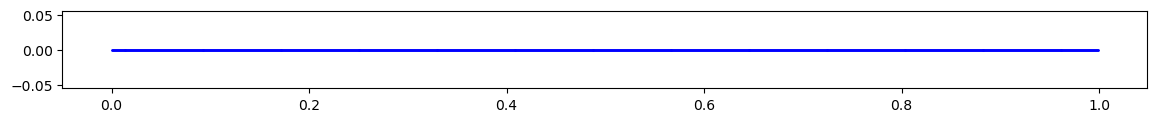

1


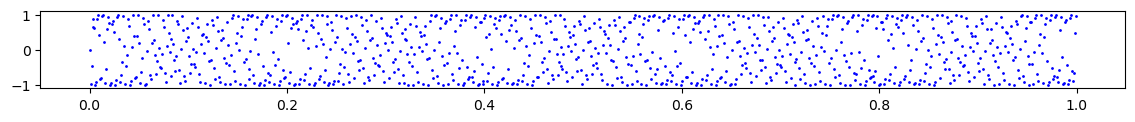

2


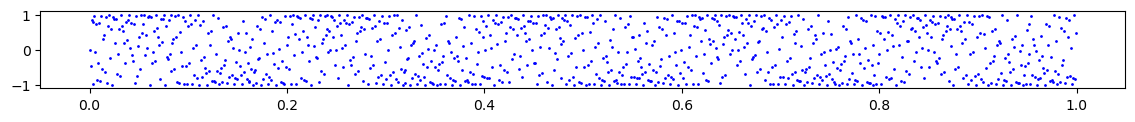

3


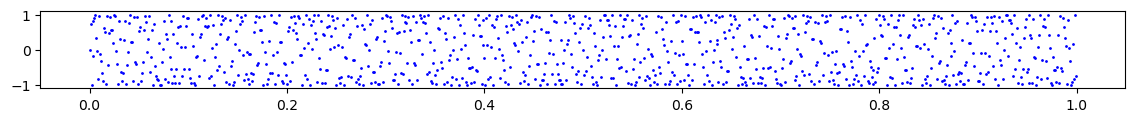

4


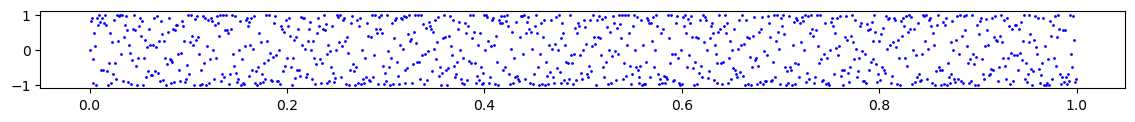

5


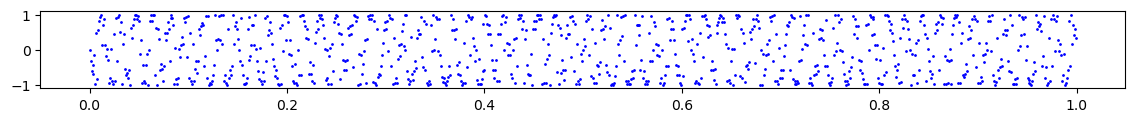

6


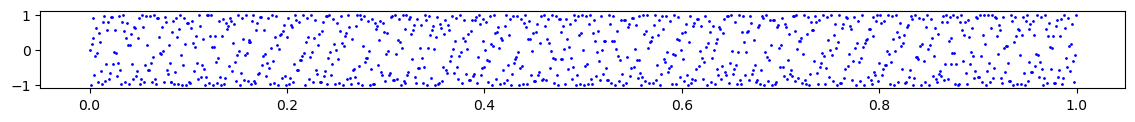

7


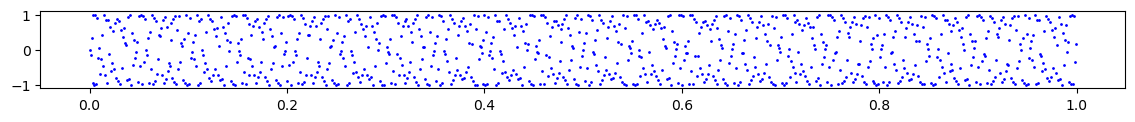

8


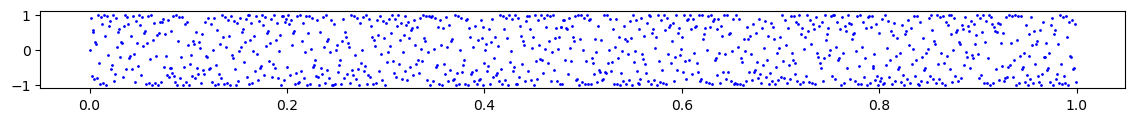

9


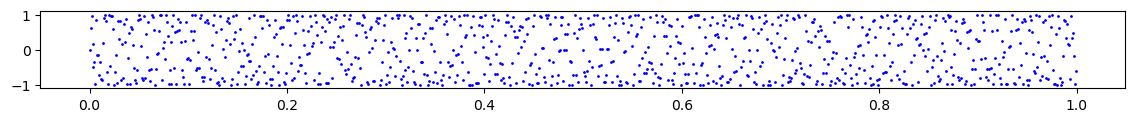

10


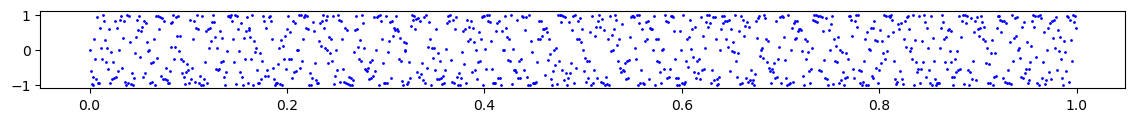

11


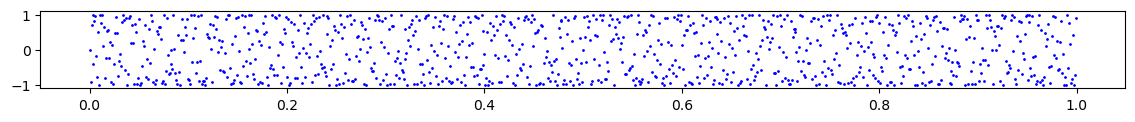

12


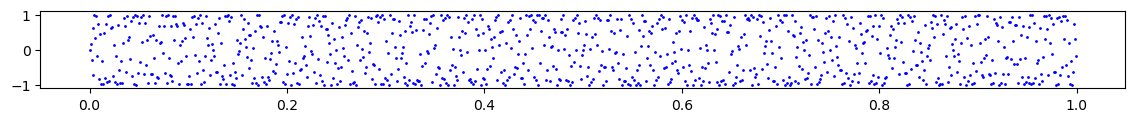

13


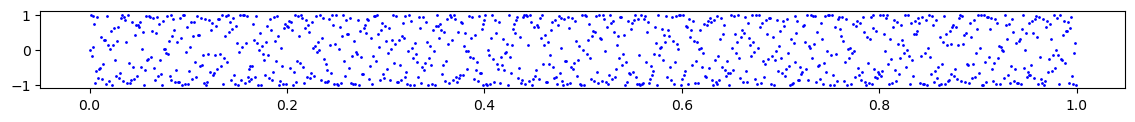

14


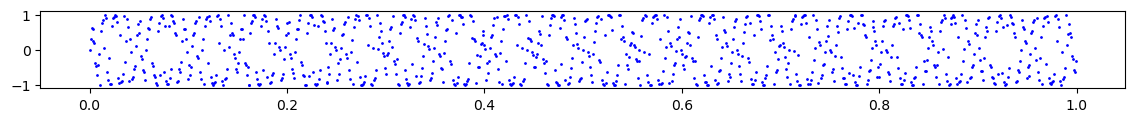

15


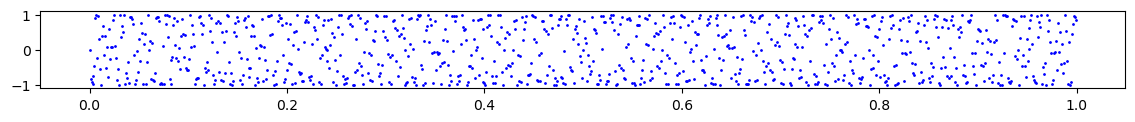

16


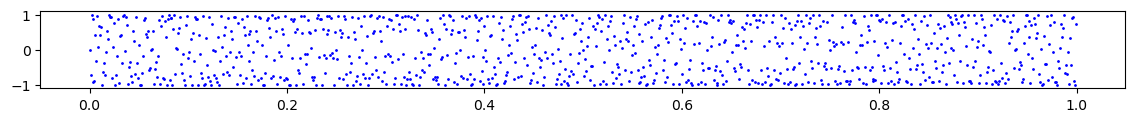

17


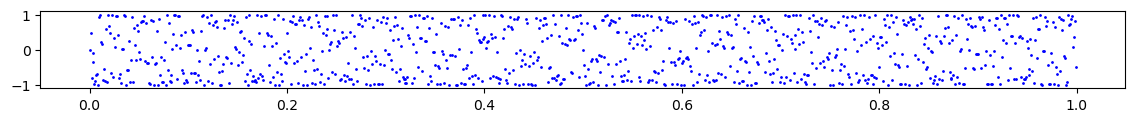

18


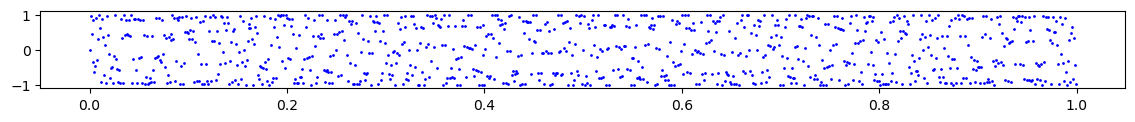

19


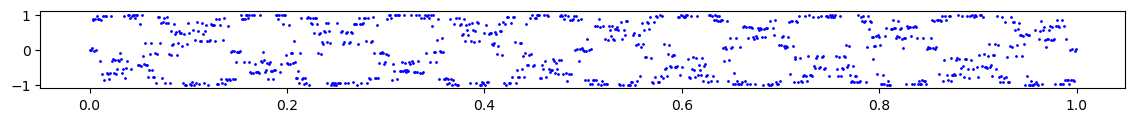

20


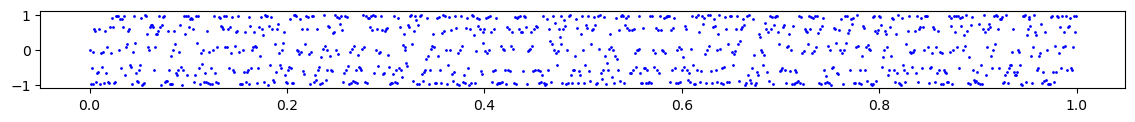

21


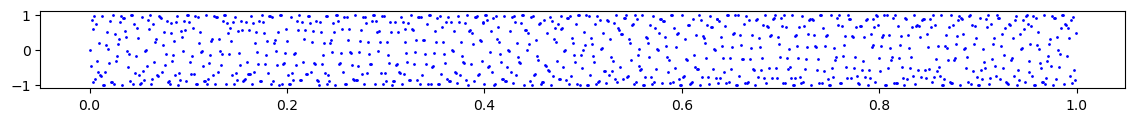

22


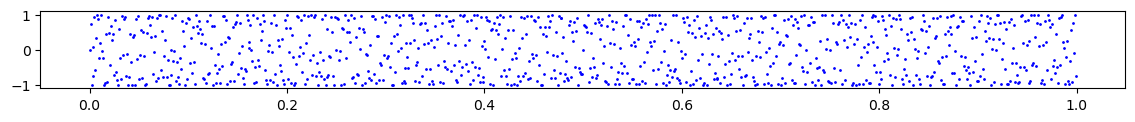

23


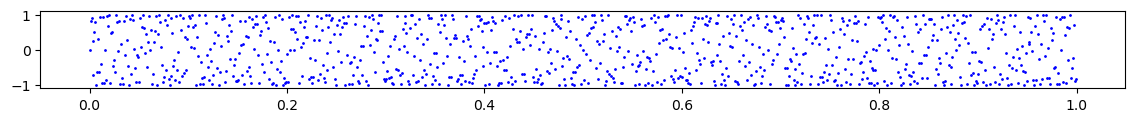

24


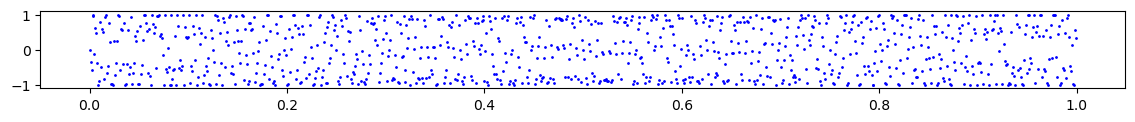

25


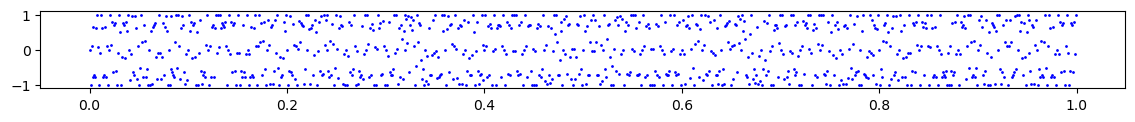

26


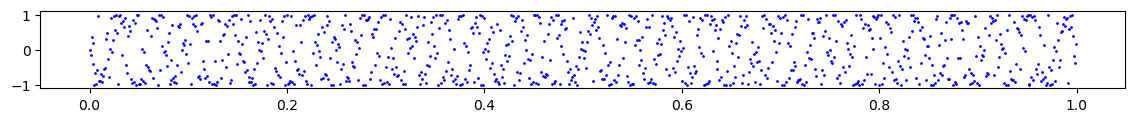

27


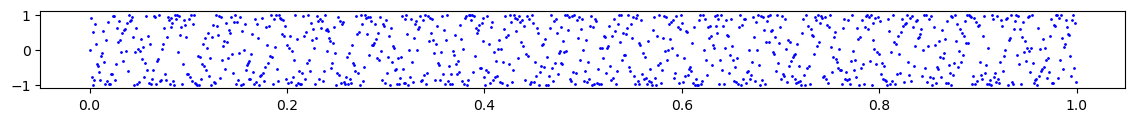

28


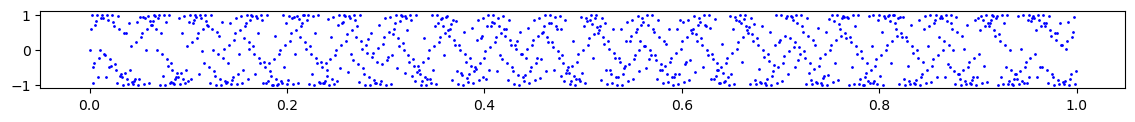

29


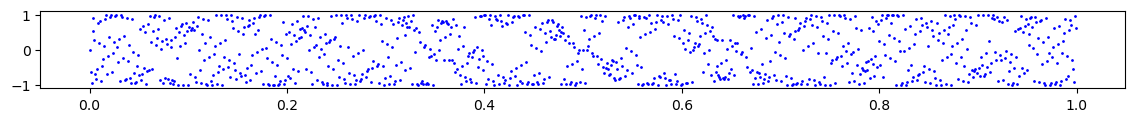

30


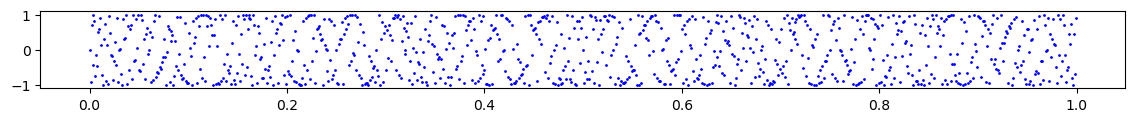

31


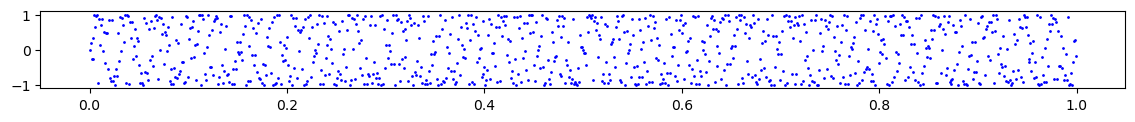

32


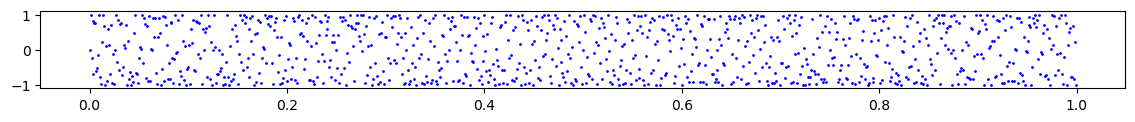

33


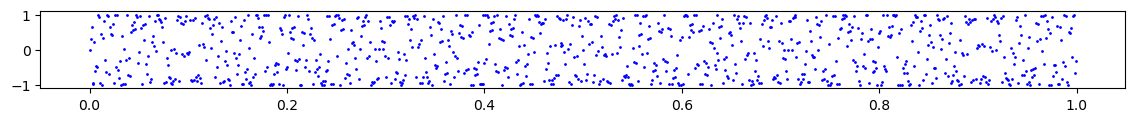

34


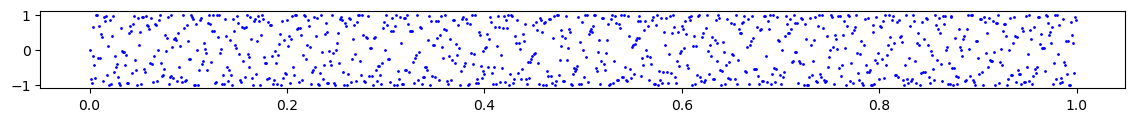

35


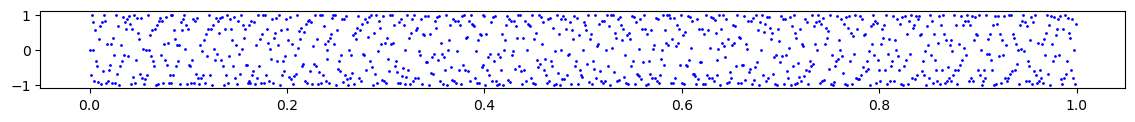

36


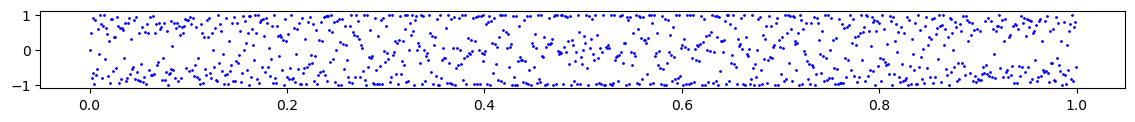

37


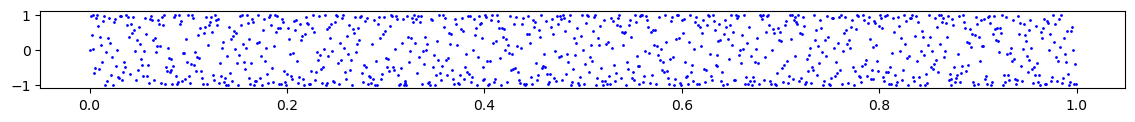

38


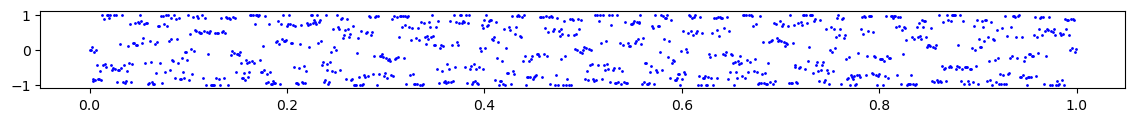

39


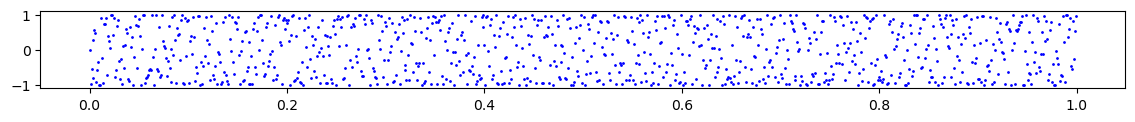

40


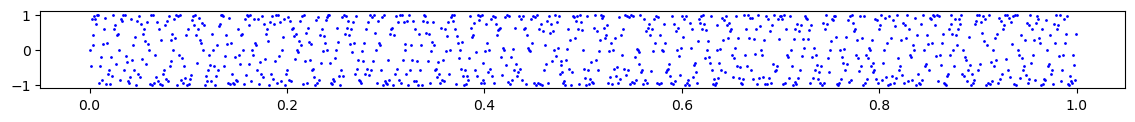

41


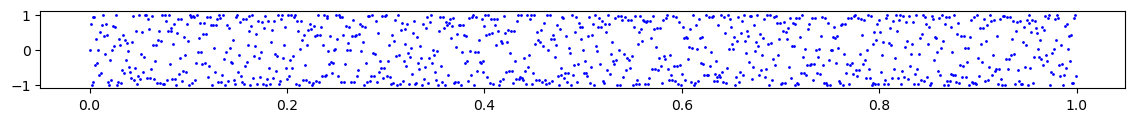

42


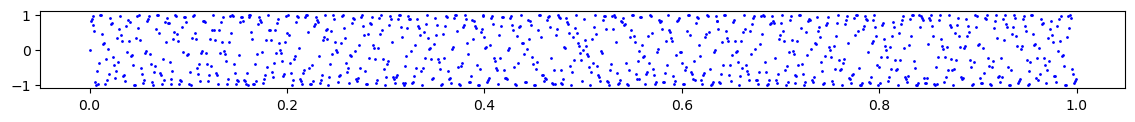

43


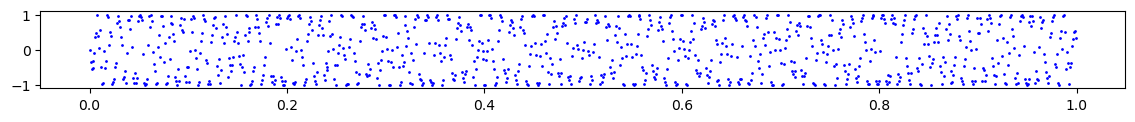

44


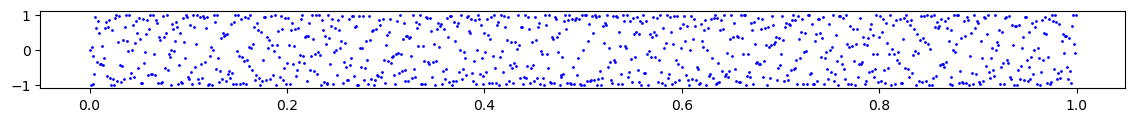

45


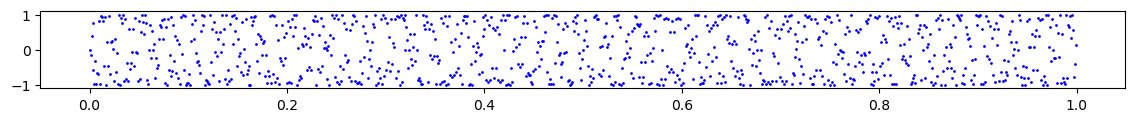

46


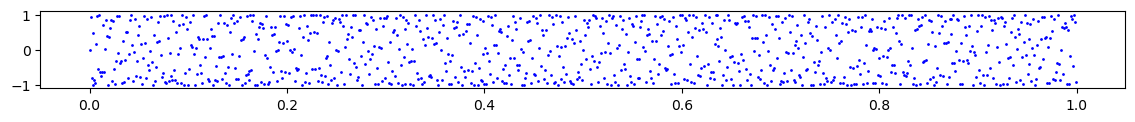

47


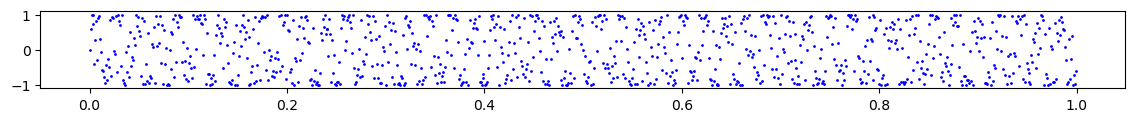

48


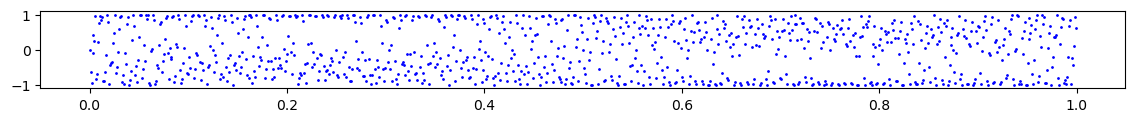

49


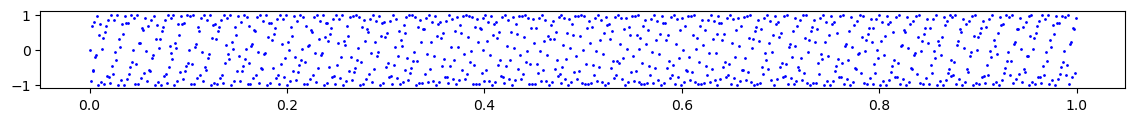

50


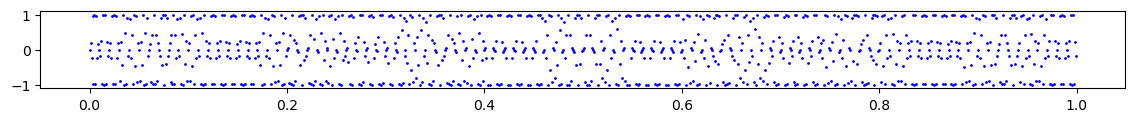

51


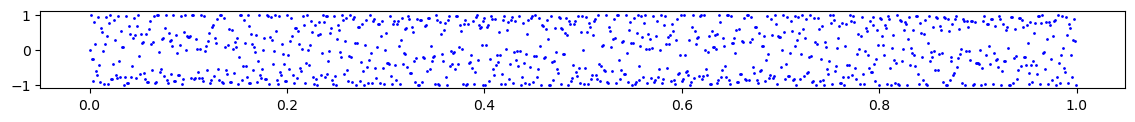

52


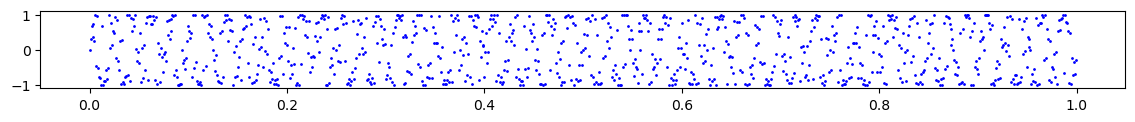

53


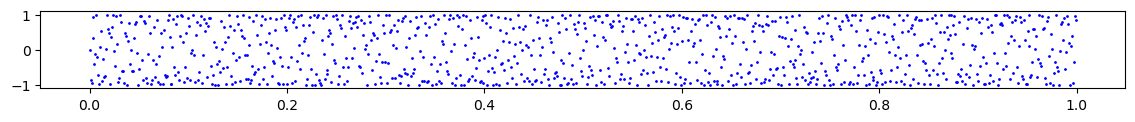

54


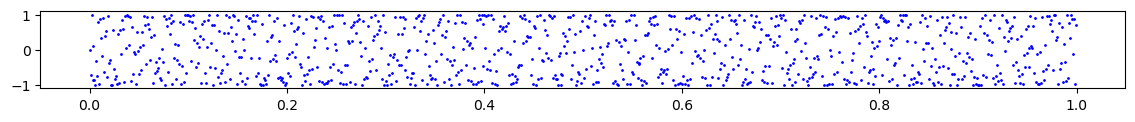

55


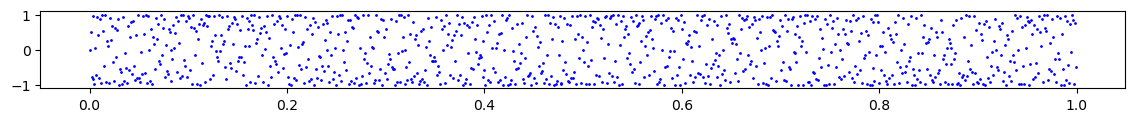

56


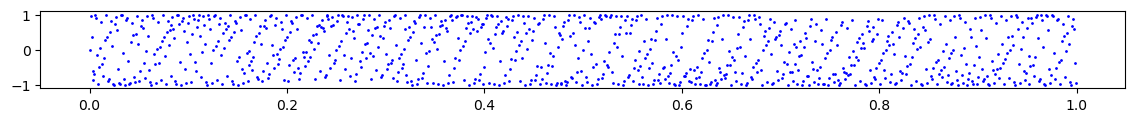

57


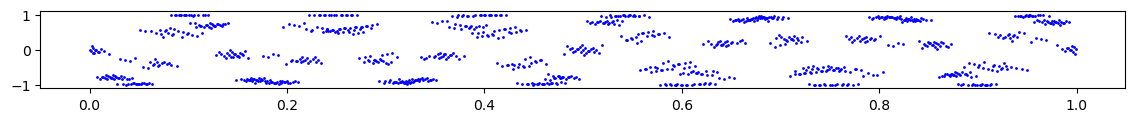

58


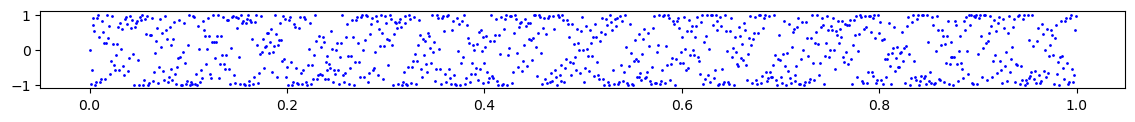

59


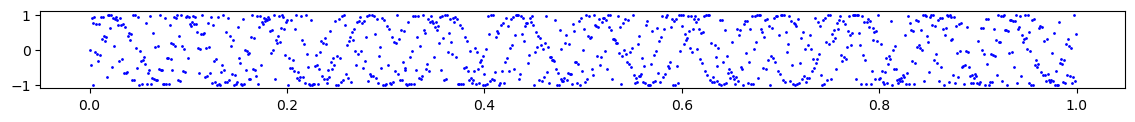

60


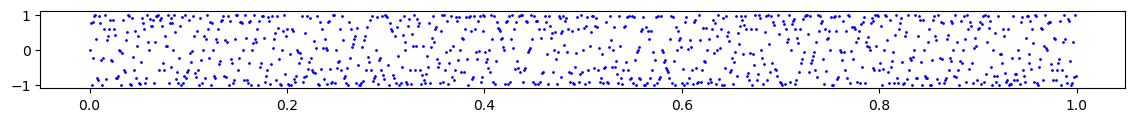

61


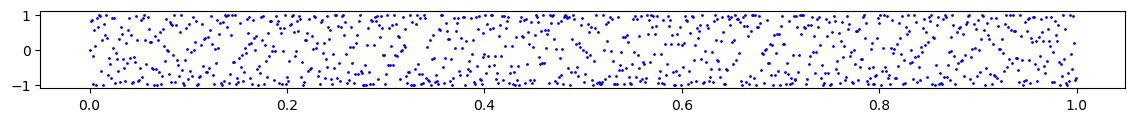

62


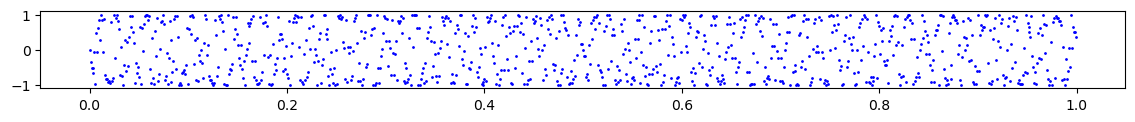

63


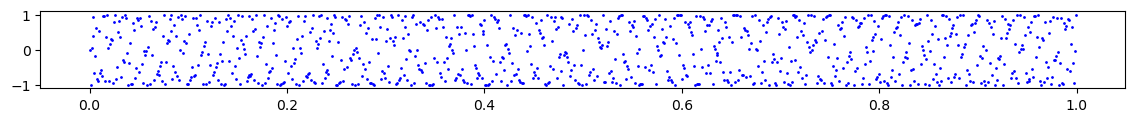

64


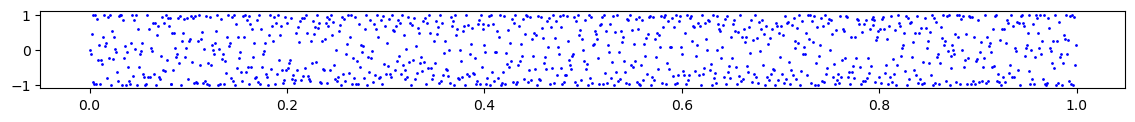

65


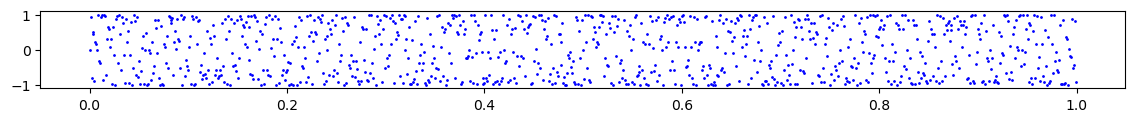

66


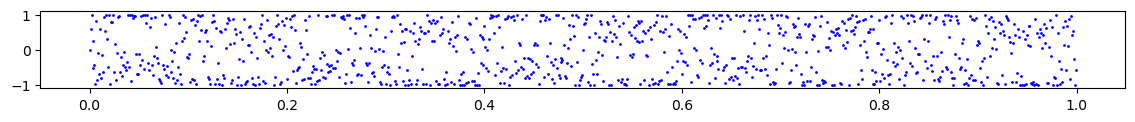

67


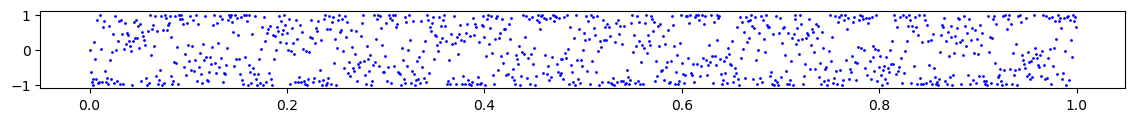

68


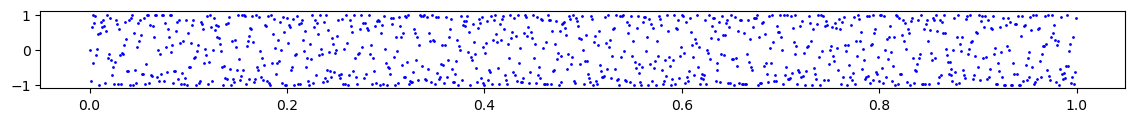

69


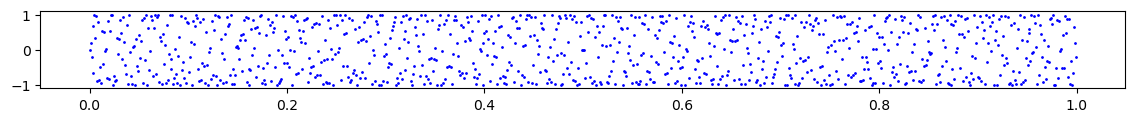

70


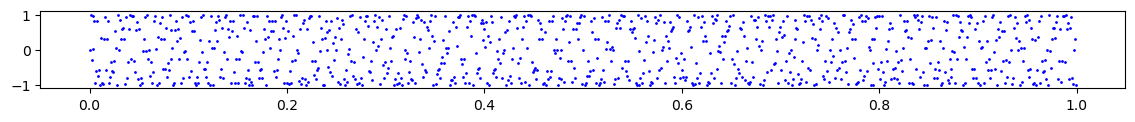

71


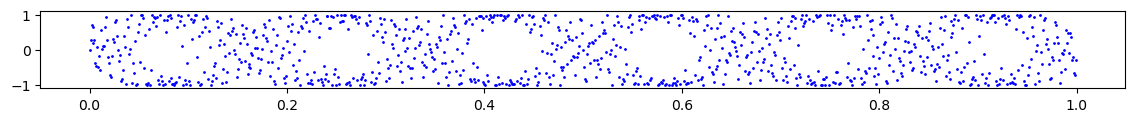

72


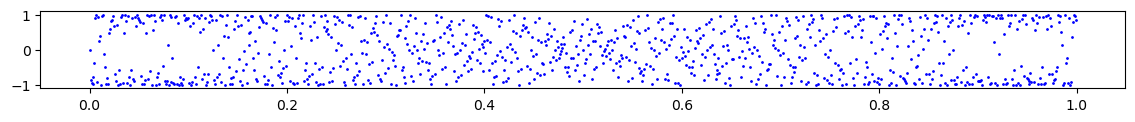

73


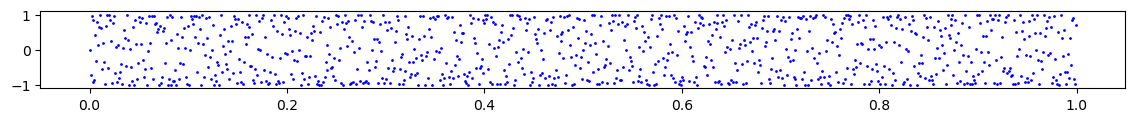

74


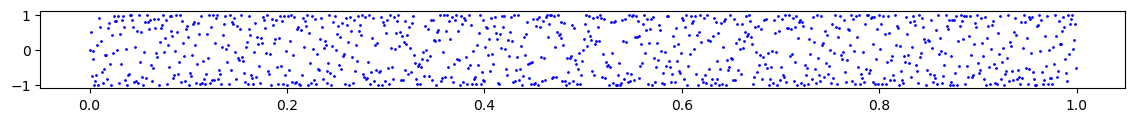

75


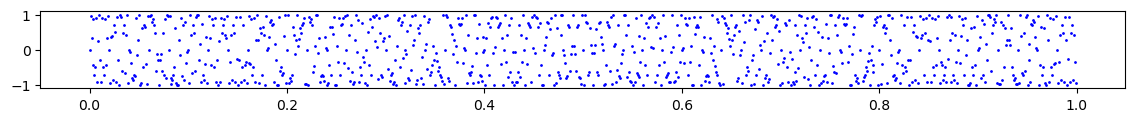

76


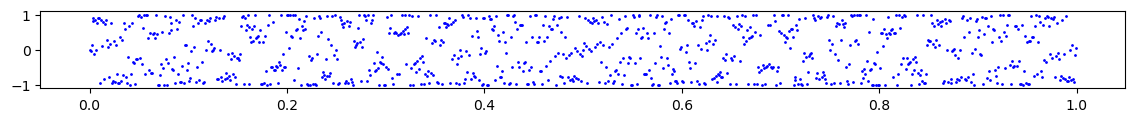

77


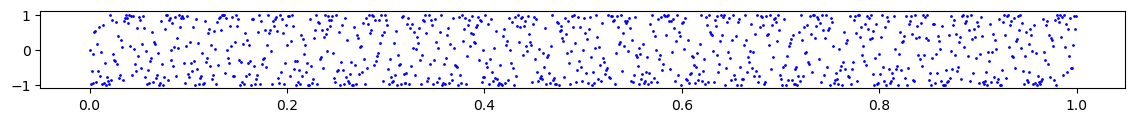

78


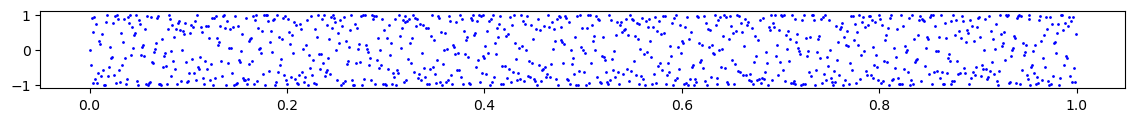

79


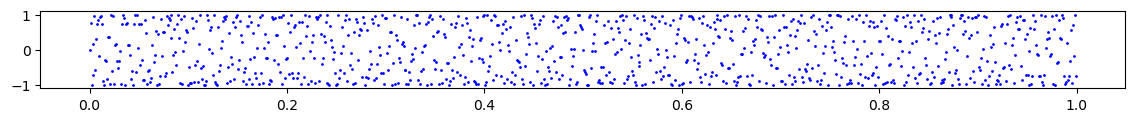

80


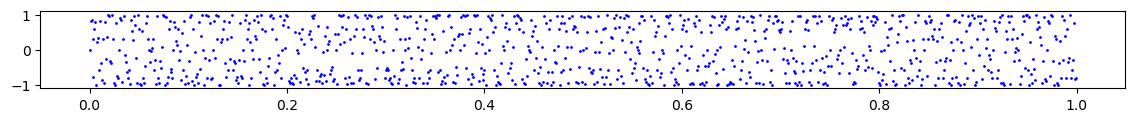

81


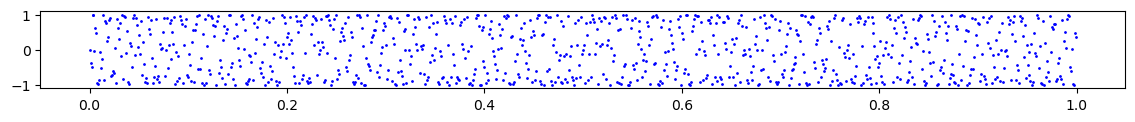

82


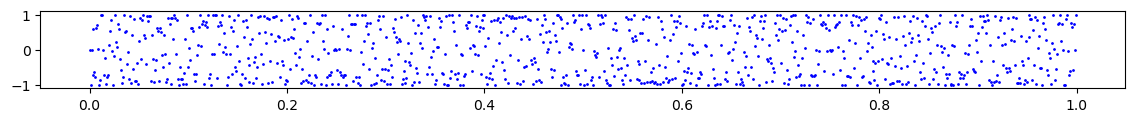

83


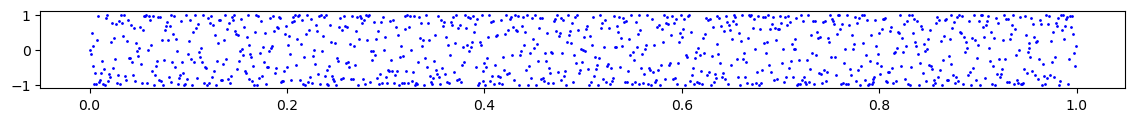

84


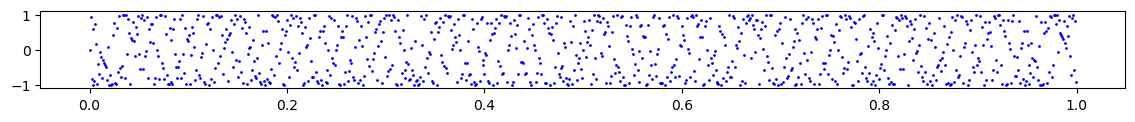

85


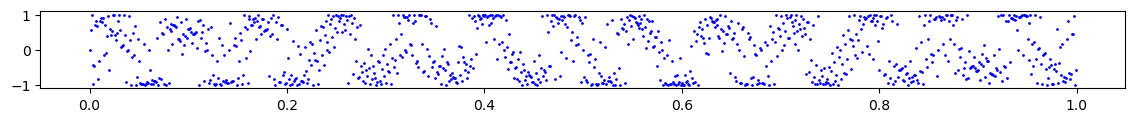

86


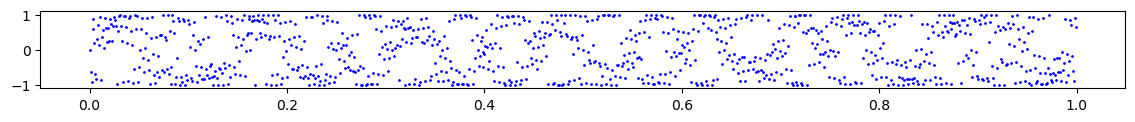

87


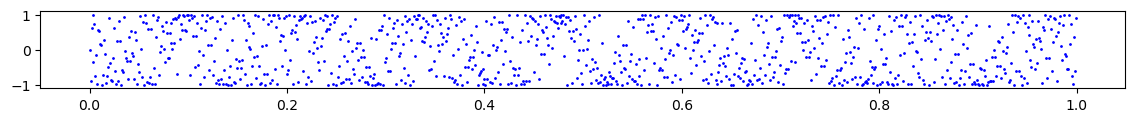

88


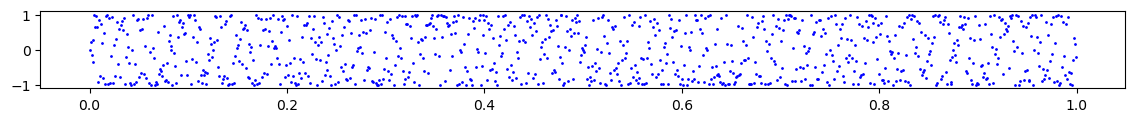

89


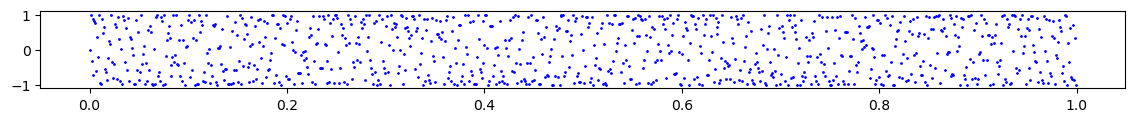

90


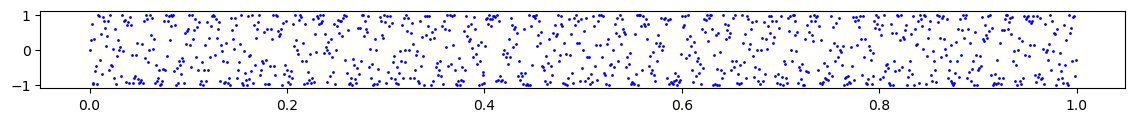

91


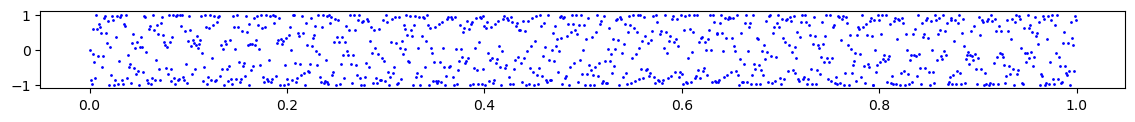

92


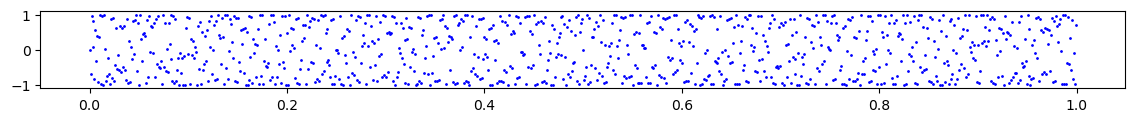

93


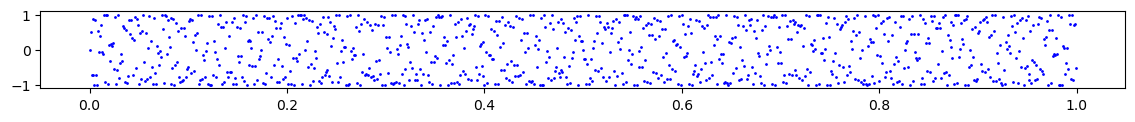

94


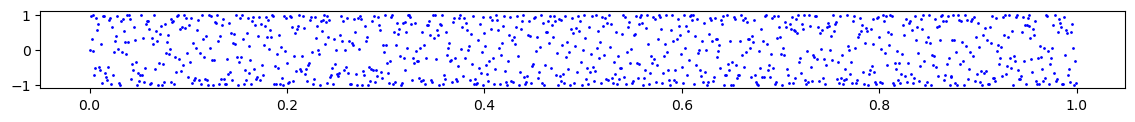

95


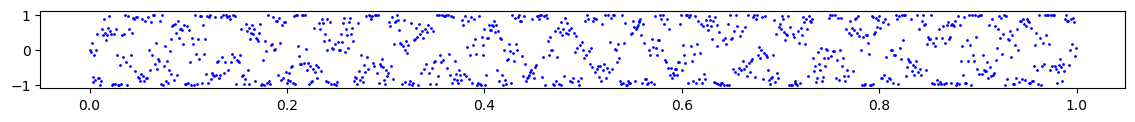

96


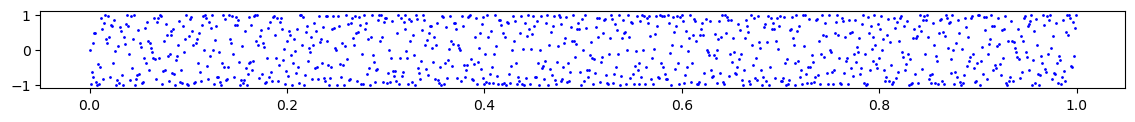

97


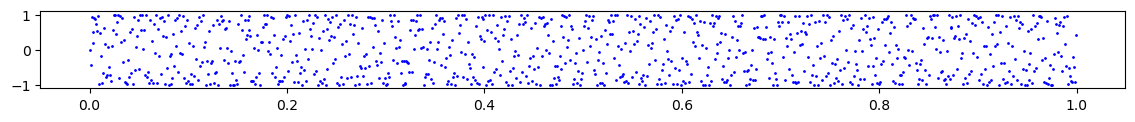

98


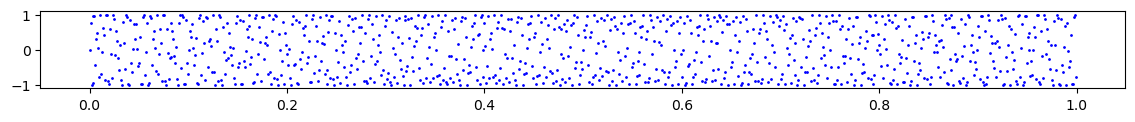

99


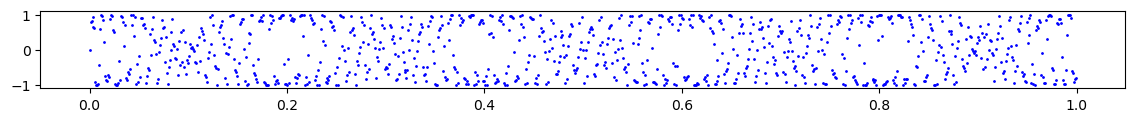

In [275]:
for x in range(100):
    print(x)
    p = 7
    b = x

    T = np.array([.001*j for j in range(1000)])

    Y = []
    Z = []
    for t in T:
        output = to_pAdic(t, p, 11)
        N = output[0]
        L = output[1]
        A = pAdic(p, L, N)
        y = A.rational
        y = b * y
        output = to_pAdic(y, p, 11)
        K = output[3]
        M = output[4]
        B = pAdic(p, M, K)
        z = B.fractional
        z = np.sin(2*np.pi* z)
        #z = np.sin(2*np.pi*z)
        Y.append(y)
        Z.append(z)
    Y = np.array(Y)
    Z = np.array(Z)

    plt.figure(figsize=(14,1))
    #plt.plot(T, Y, color='darkred')
    plt.scatter(T, Z, color='blue', s=1)
    plt.show()